# Carga de Librerias

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrames

In [2]:
df_or = pd.read_csv('Amazon2.csv')

In [3]:
df_ca = pd.read_csv('amz_ca_processed_data.csv')

In [4]:
df_uk = pd.read_csv('amz_uk_processed_data.csv')

In [5]:
df_us = pd.read_csv('amz_us_processed_data.csv')

Me fijo que todos los dataframes se hayan cargado correctamente y veo si tienen ausentes en sus columnas

In [6]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165926 entries, 0 to 2165925
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   listPrice          float64
 8   categoryName       object 
 9   isBestSeller       bool   
 10  boughtInLastMonth  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 167.3+ MB


In [7]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


In [8]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


In [9]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533769 entries, 0 to 533768
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                533769 non-null  int64  
 1   name                 533769 non-null  object 
 2   main_category        533769 non-null  object 
 3   sub_category         533769 non-null  object 
 4   image                533769 non-null  object 
 5   link                 533769 non-null  object 
 6   ratings              533769 non-null  float64
 7   no_of_ratings        533769 non-null  float64
 8   discount_price       533769 non-null  float64
 9   actual_price         533769 non-null  float64
 10  discount_price_usd   533769 non-null  float64
 11  actual_price_usd     533769 non-null  float64
 12  discount_percentage  533769 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 52.9+ MB


Ahora que se que no tiene ausentes elimino las columnas `actual_price` y `discount_price` del dataframe original ya que esta ya cuenta con dichas columnas en dolares.

In [10]:
# Eliminar las columnas 'actual_price' y 'discount_price' del DataFrame df_or
df_or = df_or.drop(columns=['actual_price', 'discount_price'])

Elimino columnas que no me sirven `asin e index`

In [11]:
# Eliminar las columnas 'asin' y 'index'
df_ca.drop(columns=['asin'], inplace=True)
df_us.drop(columns=['asin'], inplace=True)
df_uk.drop(columns=['asin'], inplace=True)
df_or.drop(columns=['index'], inplace=True)

Renombro columnas para que todas tengan la misma información

In [12]:
# Renombrar columnas para alinearlas
df_ca.rename(columns={'listPrice': 'actual_price', 'price': 'discount_price'}, inplace=True)
df_us.rename(columns={'listPrice': 'actual_price', 'price': 'discount_price'}, inplace=True)
df_uk.rename(columns={'price': 'actual_price'}, inplace=True)  
df_or.rename(columns={'name': 'title'}, inplace=True)

In [13]:
df_uk.head(5)

,title,imgUrl,productURL,stars,reviews,actual_price,isBestSeller,boughtInLastMonth,categoryName
0,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Tasa de Conversion

In [14]:
# Tasa de conversión
conversion_rates = {'UK': 1.28, 'Canada': 0.73}

# Agregando nuevas columnas con precios en dólares a df_uk y df_ca
df_uk['actual_price_usd'] = df_uk['actual_price'] * conversion_rates['UK']
df_uk['discount_price_usd'] = 0  
df_uk['discount_price'] = 0  

df_ca['discount_price_usd'] = df_ca['discount_price'] * conversion_rates['Canada']
df_ca['actual_price_usd'] = df_ca['actual_price'] * conversion_rates['Canada']

# Agregar nueva columna a df_us
df_us['discount_price_usd'] = df_us['discount_price']
df_us['actual_price_usd'] = df_us['actual_price']

In [15]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   title               1426336 non-null  object 
 1   imgUrl              1426337 non-null  object 
 2   productURL          1426337 non-null  object 
 3   stars               1426337 non-null  float64
 4   reviews             1426337 non-null  int64  
 5   discount_price      1426337 non-null  float64
 6   actual_price        1426337 non-null  float64
 7   category_id         1426337 non-null  int64  
 8   isBestSeller        1426337 non-null  bool   
 9   boughtInLastMonth   1426337 non-null  int64  
 10  discount_price_usd  1426337 non-null  float64
 11  actual_price_usd    1426337 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 121.1+ MB


In [16]:
# Asegurar la existencia de columnas 'actual_price_usd' y 'discount_price_usd' en los DataFrames y realizar la conversión
for df in [df_uk, df_ca, df_us, df_or]:
    # Asignar tasa de conversión específica
    if df is df_uk:
        conversion_rate = conversion_rates['UK']
        df['actual_price_usd'] = df['actual_price'] * conversion_rate if 'actual_price' in df.columns else np.nan
        df['discount_price_usd'] = df['discount_price'] * conversion_rate if 'discount_price' in df.columns else np.nan
    elif df is df_ca:
        conversion_rate = conversion_rates['Canada']
        df['actual_price_usd'] = df['actual_price'] * conversion_rate if 'actual_price' in df.columns else np.nan
        df['discount_price_usd'] = df['discount_price'] * conversion_rate if 'discount_price' in df.columns else np.nan
    else:
        conversion_rate = 1  # Para df_us y df_or (ya están en USD)
        df['actual_price_usd'] = df['actual_price_usd'] if 'actual_price_usd' in df.columns else np.nan
        df['discount_price_usd'] = df['discount_price_usd'] if 'discount_price_usd' in df.columns else np.nan

    # Asegurar que las columnas de precio están en float
    df['actual_price_usd'] = df['actual_price_usd'].astype(float)
    df['discount_price_usd'] = df['discount_price_usd'].astype(float) if 'discount_price_usd' in df.columns else np.nan

    # Calcular el porcentaje de descuento
    df['discount_percentage'] = np.where(df['actual_price_usd'] != 0,
                                         100 * (df['actual_price_usd'] - df['discount_price_usd']) / df['actual_price_usd'],
                                         0)

# Verificar los resultados
print(df_ca[['actual_price_usd', 'discount_price_usd', 'discount_percentage']].head())
print(df_us[['actual_price_usd', 'discount_price_usd', 'discount_percentage']].head())
print(df_uk[['actual_price_usd', 'discount_price_usd', 'discount_percentage']].head())
print(df_or[['actual_price_usd', 'discount_price_usd', 'discount_percentage']].head())



   actual_price_usd  discount_price_usd  discount_percentage
0            0.0000             34.8137             0.000000
1            0.0000              8.0227             0.000000
2           20.4327             18.9727             7.145409
3           22.6227             16.0527            29.041626
4            0.0000             13.8627             0.000000
   actual_price_usd  discount_price_usd  discount_percentage
0              0.00              139.99             0.000000
1            209.99              169.99            19.048526
2            429.99              365.49            15.000349
3            354.37              291.59            17.715947
4            309.99              174.99            43.549792
   actual_price_usd  discount_price_usd  discount_percentage
0           28.1472                 0.0                100.0
1           30.7072                 0.0                100.0
2           28.1472                 0.0                100.0
3           40.9472     

## Unificación de los dataframes en uno solo

Primero le agrego la columna `country` para poder identificar el precio de cada país.

In [17]:
# Unificar datasets en uno solo para comparar
df_ca['country'] = 'Canada'
df_us['country'] = 'US'
df_uk['country'] = 'UK'
df_or['country'] = 'India'

Luego selecciono las columnas que me interesa análizar.

In [18]:
# Seleccionar columnas relevantes
common_columns = ['title', 'actual_price_usd', 'discount_percentage', 'discount_price_usd', 'country']
df_ca = df_ca[common_columns]
df_us = df_us[common_columns]
df_uk = df_uk[common_columns]
df_or = df_or[common_columns]

Cocateno los dataframes en uno solo `df_all`

In [19]:
# Concatenar todos los DataFrames
df_all = pd.concat([df_ca, df_us, df_uk, df_or])

# Mostrar los primeros registros del DataFrame unificado
df_all.head()

,title,actual_price_usd,discount_percentage,discount_price_usd,country
0,"Green Leaf WW3D Wonder Extension Cord Winder, ...",0.0000,0.000000,34.8137,Canada
1,8pcs Toilet Seat Bumpers Universal Toilet Repl...,0.0000,0.000000,8.0227,Canada
2,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,20.4327,7.145409,18.9727,Canada
3,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,22.6227,29.041626,16.0527,Canada
4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",0.0000,0.000000,13.8627,Canada


# Análisis de precios y descuentos

In [20]:
# Comparar precios promedio
avg_prices = df_all.groupby('country')['actual_price_usd'].mean()

# Comparar descuentos promedio
avg_discounts = df_all.groupby('country')['discount_percentage'].mean()

# Mostrar resultados
print("Precios promedio por país:")
print(avg_prices)

print("\nDescuentos promedio por país:")
print(avg_discounts)


Precios promedio por país:
country
Canada      3.395510
India     277.336960
UK        120.649439
US         12.449160
Name: actual_price_usd, dtype: float64

Descuentos promedio por país:
country
Canada     1.305479
India     53.377660
UK        99.999190
US         5.056602
Name: discount_percentage, dtype: float64


## Filtro para analizar productos comunes en diferentes paises y sus precios

In [21]:
# Primero, agrupamos por 'title' y 'country' para verificar si hay productos con el mismo nombre en diferentes países
grouped = df_all.groupby(['title', 'country']).agg({
    'discount_price_usd': 'mean',
    'actual_price_usd': 'mean',
    'discount_price_usd': 'mean'
}).reset_index()

# Ahora, identificamos los productos que están en más de un país
product_counts = grouped['title'].value_counts()
repeated_products = product_counts[product_counts > 1].index

# Filtrar el DataFrame para mantener solo los productos que se repiten en diferentes países
repeated_df = grouped[grouped['title'].isin(repeated_products)]

# Mostrar el DataFrame filtrado
print(repeated_df)

# Para una comparación detallada, podemos pivotar el DataFrame
comparison_df = repeated_df.pivot(index='title', columns='country', values='discount_price_usd')

# Mostrar el DataFrame comparativo
comparison_df

                                                     title country  \
24        Cool Wall Stickers for Schools, Kids Rooms, N...  Canada   
25        Cool Wall Stickers for Schools, Kids Rooms, N...      US   
57        L-Track Double Stud Tie Down Fitting with O R...  Canada   
58        L-Track Double Stud Tie Down Fitting with O R...      US   
287      "Basic" Curved Stick Front/Back Linear Drop Ea...  Canada   
...                                                    ...     ...   
5908702  𝟮𝟬𝟮𝟮 𝙉𝙚𝙬 LAUNCH OBD2 Extension Cable Full 16Pi...      US   
5908731  𝟮𝟬𝟮𝟯 𝙐𝙥𝙜𝙧𝙖𝙙𝙚𝙙 3316348.900 RV Fridge Circuit Bo...  Canada   
5908732  𝟮𝟬𝟮𝟯 𝙐𝙥𝙜𝙧𝙖𝙙𝙚𝙙 3316348.900 RV Fridge Circuit Bo...      US   
5908776  📬 United States Postal Mail Truck USPS 1987 Gr...  Canada   
5908777  📬 United States Postal Mail Truck USPS 1987 Gr...      US   

         discount_price_usd  actual_price_usd  
24                  17.5346               0.0  
25                  12.9900               0.0  
57             

country,Canada,India,UK,US
title,,,,
"Cool Wall Stickers for Schools, Kids Rooms, Nurseries Quote Small Army Men Bucket of Soldiers Home Decoration Vinyl Decal and Decor",17.5346,NaN,NaN,12.99
"L-Track Double Stud Tie Down Fitting with O Ring | Used with L Track Rail for Truck Bed,Trailer Cargo Control,Pickup,RV,ATV,Bearing 5000 LBS Heavy Duty Steel (Pack of 6 Black)",27.7327,NaN,NaN,27.99
"""Basic"" Curved Stick Front/Back Linear Drop Earrings",15.4030,NaN,NaN,13.63
"""Basic"" Silver Framed Heart Logo Pendant Necklace, 18"" + 2"" Extender",15.4030,NaN,NaN,14.47
"""Coffee"" kitchen wall stickers, Tea Cup wall art, Kitchen stickers, Restaurant wall decal, Removable Vinyl decals,",9.4900,NaN,0.0,NaN
...,...,...,...,...
"𝟐𝟎𝟐𝟑 𝐔𝐩𝐠𝐫𝐚𝐝𝐞𝐝 Apple Watch Charger,2-in-1 USB C Charger for iWatch & iPhone,3FT Fast Charging Cable with 20W Fast Wall Charger for Apple Watch Series 8/7/6/5/SE & iPhone14/13/12/AirPods",NaN,NaN,0.0,17.99
"𝟐𝟎𝟐𝟑 𝐔𝐩𝐠𝐫𝐚𝐝𝐞𝐝 Apple Watch Charger,2-in-1 USB C Charger for iWatch & iPhone,6FT Fast Charging Cable with 20W Fast Wall Charger for Apple Watch Series 8/7/6/5/SE & iPhone14/13/12/AirPods",NaN,NaN,0.0,17.99
𝟮𝟬𝟮𝟮 𝙉𝙚𝙬 LAUNCH OBD2 Extension Cable Full 16Pin Male to Female OBDII Extend Cable for Car OBD Diagnostic Extender Cord Connector Reinforced Nylon Material (36CM/1.2FT),19.5786,NaN,NaN,11.99


## Conteo de cuantas veces aparece cada producto por país

In [22]:
# Agrupar por 'title' y 'country' para contar las repeticiones y calcular el precio promedio
grouped = df_all.groupby(['title', 'country']).agg({
    'title': 'count',
    'discount_price_usd': 'mean',
    'actual_price_usd': 'mean'
}).rename(columns={'title': 'count'}).reset_index()

# Mostrar el DataFrame resultante
print(grouped)


                                                     title country  count  \
0         10" Faucet Hole Cover Deck Plate, Escutcheon ...  Canada      1   
1                  1990 Proof Like / Uncirculated Coin Set  Canada      1   
2         1Cap 1Case 1Side 3 in 1 For -IQOS 3.0 Magneti...  Canada      1   
3         2 Pack Reflective Police Patch Hook & Loop, D...  Canada      1   
4         2Pcs Silicone Eyeliner Stencil, Multifunction...  Canada      1   
...                                                    ...     ...    ...   
5908779  🚌 KiNSFUN 5" Monster School Bus Die Cast Metal...      US      1   
5908780  🛀 Aksoy Epsom Salt 1KG || Epsom Bath Salts || ...      UK      1   
5908781  🛦 United States Air Force SR-71A Blackbird 8" ...      US      1   
5908782  🟤 Aksoy Brown Whole Flaxseed (Linseed) 650gr |...      UK      1   
5908783  🥧 RLS 11pcs Wooden Toy Microwave oven with pre...      UK      1   

         discount_price_usd  actual_price_usd  
0                    8.0227

## Conteo de productos que se repiten en mas de una ocación por país

In [23]:
# Agrupar por 'title' y 'country' para calcular el promedio de los precios
grouped = df_all.groupby(['title', 'country']).agg({
    'discount_price_usd': 'mean',
    'actual_price_usd': 'mean'
}).reset_index()

# Contar cuántas veces se repite cada producto por país
product_counts = df_all.groupby(['title', 'country']).size().reset_index(name='count')

# Filtrar los productos que se repiten más de una vez en cada país
repeated_products = product_counts[product_counts['count'] > 1]

# Unir el DataFrame filtrado con el DataFrame de precios promedio
repeated_products_with_prices = pd.merge(repeated_products, grouped, on=['title', 'country'])

# Agrupar por 'country' para obtener el promedio de los precios de los productos repetidos en cada país
average_prices_by_country = repeated_products_with_prices.groupby('country').agg({
    'discount_price_usd': 'mean',
    'actual_price_usd': 'mean'
}).reset_index()

# Mostrar el DataFrame resultante
print(average_prices_by_country)


  country  discount_price_usd  actual_price_usd
0  Canada          160.296435          3.553047
1   India           26.755804         49.360213
2      UK            0.000000        227.409561
3      US           39.762606         13.643232


# Graficos 

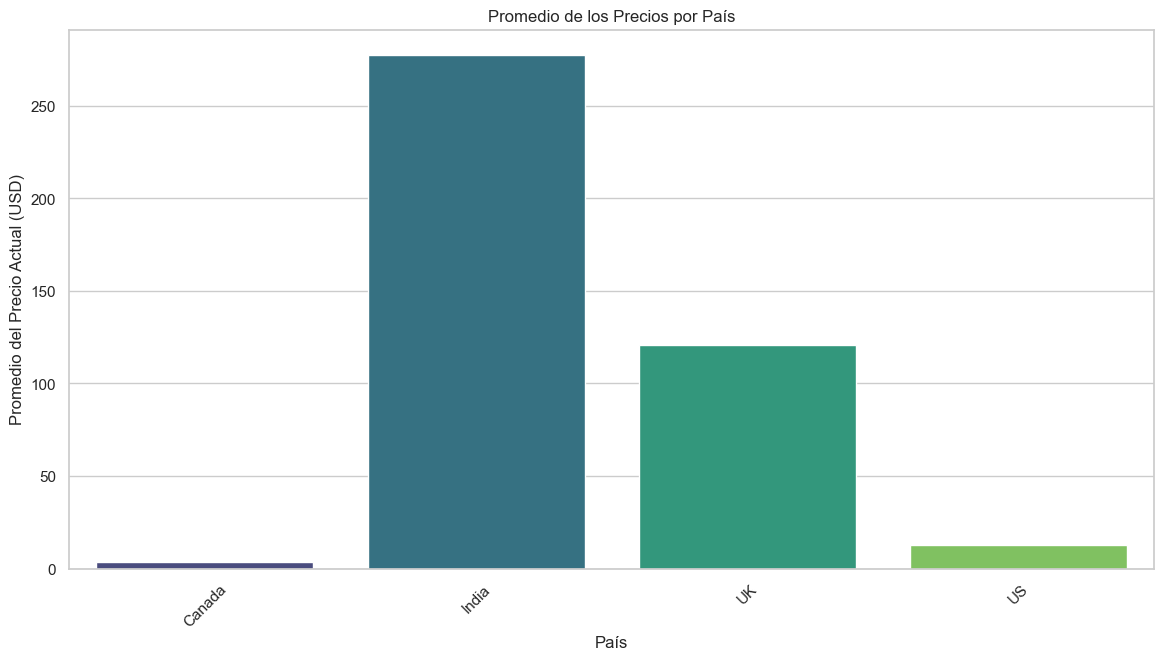

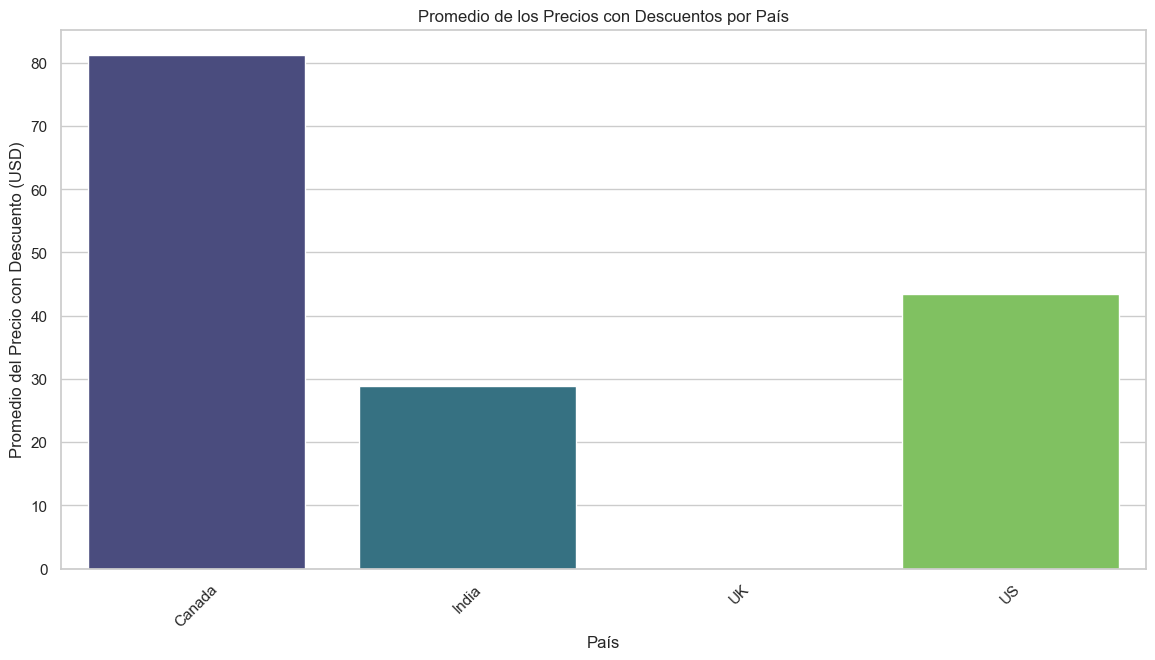

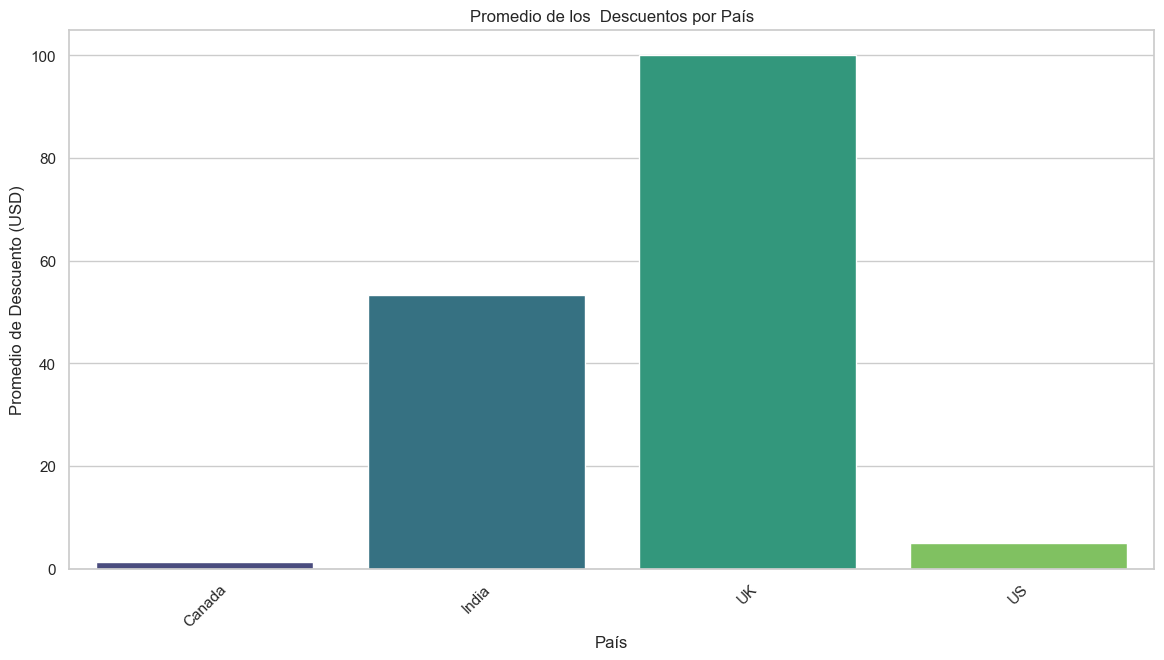

In [24]:
# Me aseguro de que las columnas de precios están en float
df_all['actual_price_usd'] = df_all['actual_price_usd'].astype(float)
df_all['discount_price_usd'] = df_all['discount_price_usd'].astype(float)

# Calcular el porcentaje de descuento
df_all['discount_percentage'] = np.where(
    df_all['actual_price_usd'] != 0,
    100 * (df_all['actual_price_usd'] - df_all['discount_price_usd']) / df_all['actual_price_usd'],
    0
)

# Agrupar por 'country' para obtener el promedio de los precios y el porcentaje de descuento
average_prices_by_country = df_all.groupby('country').agg({
    'discount_price_usd': 'mean',
    'actual_price_usd': 'mean',
    'discount_percentage': 'mean'
}).reset_index()

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para 'actual_price_usd'
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='actual_price_usd', data=average_prices_by_country, palette='viridis')
plt.title('Promedio de los Precios por País')
plt.ylabel('Promedio del Precio Actual (USD)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de barras para 'discount_price_usd'
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='discount_price_usd', data=average_prices_by_country, palette='viridis')
plt.title('Promedio de los Precios con Descuentos por País')
plt.ylabel('Promedio del Precio con Descuento (USD)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de barras para 'discount_percentage'
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='discount_percentage', data=average_prices_by_country, palette='viridis')
plt.title('Promedio de los  Descuentos por País')
plt.ylabel('Promedio de Descuento (USD)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()